In [ ]:
!pip install --upgrade yfinance

     |████████████████████████████████| 5.5MB 13.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=f9883a8a3ab9ba1fa01e2db5a971c7467a637ba53d2d891fca20710156c8c226
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
print("yfinance imported")
!pip show yfinance

yfinance imported
Name: yfinance
Version: 0.1.55
Summary: Yahoo! Finance market data downloader
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, multitasking, pandas, lxml, requests
Required-by: 


In [ ]:

apple_df = yf.download('AAPL', 
                      start='2001-01-01', 
                      end='2020-10-11')
apple_df.sample(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-27,51.965000,52.137501,50.882500,51.040001,50.538563,103493200
2020-05-18,78.292503,79.125000,77.580002,78.739998,78.598282,135372400
2015-09-25,29.110001,29.172501,28.504999,28.677500,26.501280,224607600
2006-08-25,2.405000,2.466071,2.403929,2.455357,2.121770,543958800
2005-09-29,1.829643,1.878214,1.814643,1.869286,1.615323,636846000


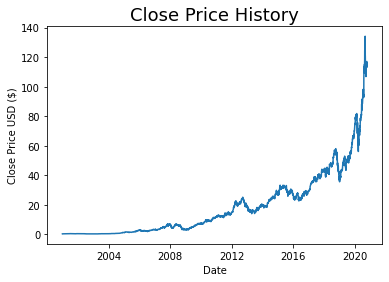

In [ ]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(apple_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
import numpy as np
#Create a new dataframe with only the 'Close column
data = apple_df.filter(['Close'])
date = apple_df.filter(['Date'])
#Convert the dataframe to a numpy array
dataset = data.values
date_dataset = date.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_date_len = int(np.ceil( len(date_dataset) * .8 ))

print(training_date_len)
training_data_len

3980


3980

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(4975, 1)

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(date_dataset, scaled_data, test_size = 0.20) 
#X_train.shape

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

(3920, 60, 1)
(3920,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (6, 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
40/40 [==============================] - 1s 27ms/step - loss: 0.0010
Epoch 2/10
40/40 [==============================] - 1s 27ms/step - loss: 2.3624e-05
Epoch 3/10
40/40 [==============================] - 1s 27ms/step - loss: 1.4431e-05
Epoch 4/10
40/40 [==============================] - 1s 27ms/step - loss: 1.4127e-05
Epoch 5/10
40/40 [==============================] - 1s 26ms/step - loss: 1.3351e-05
Epoch 6/10
40/40 [==============================] - 1s 27ms/step - loss: 1.3055e-05
Epoch 7/10
40/40 [==============================] - 1s 27ms/step - loss: 1.2862e-05
Epoch 8/10
40/40 [==============================] - 1s 27ms/step - loss: 1.2840e-05
Epoch 9/10
40/40 [==============================] - 1s 27ms/step - loss: 1.3123e-05
Epoch 10/10
40/40 [==============================] - 1s 27ms/step - loss: 1.3490e-05


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.7649133341194605

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


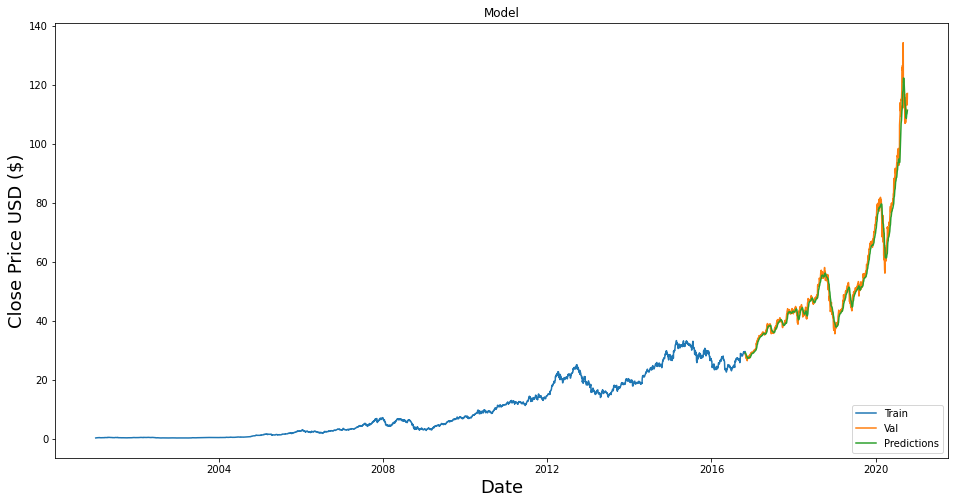

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
print(valid)

                 Close  Predictions
Date                               
2016-10-27   28.620001    29.166321
2016-10-28   28.430000    29.127201
2016-10-31   28.385000    29.051601
2016-11-01   27.872499    28.955919
2016-11-02   27.897499    28.820923
...                ...          ...
2020-10-05  116.500000   110.115669
2020-10-06  113.160004   110.579697
2020-10-07  115.080002   110.836121
2020-10-08  114.970001   111.087845
2020-10-09  116.970001   111.306007

[995 rows x 2 columns]


In [1]:
import pandas as pd 
news_df = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM')

print(news_df.head())
print(news_df.tail())

   publish_date  ...                                      headline_text
0      20010101  ...  win over cena satisfying but defeating underta...
1      20010102  ...  Status quo will not be disturbed at Ayodhya; s...
2      20010102  ...                Fissures in Hurriyat over Pak visit
3      20010102  ...              America's unwanted heading for India?
4      20010102  ...                 For bigwigs; it is destination Goa

[5 rows x 3 columns]
         publish_date  ...                                      headline_text
3297167      20200630  ...      why tiktok removed 1 65 crore videos in india
3297168      20200630  ...  apurva asrani calls alia bhatts mother soni ra...
3297169      20200630  ...  kangana ranaut gets a doll version of herself ...
3297170      20200630  ...  meezaan jaffrey reminisces his childhood days ...
3297171      20200630  ...  prabhas20 titled as radhe shyam prabhas and po...

[5 rows x 3 columns]


In [2]:
news_df["publish_date"] = pd.to_datetime(news_df["publish_date"].astype(str), format='%Y%m%d')
news_df.rename(columns = {"publish_date":"Date"}, inplace = True) 
news_df.head()

,Date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


Deleting duplicate Headlines

In [3]:
news_df[news_df['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(10)

,Date,headline_category,headline_text
423176,2006-09-15,unknown,Umrao Jaan is not a remake
423053,2006-09-15,entertainment.hindi.bollywood,Umrao Jaan is not a remake
421279,2006-09-06,india,Vande Mataram not to be sung by Sikhs
421376,2006-09-06,unknown,Vande Mataram not to be sung by Sikhs
3176865,2019-11-03,sports.off-the-field,#Airpocalypse: Why visiting cricket teams 'cho...
3176859,2019-11-03,city.delhi,#Airpocalypse: Why visiting cricket teams 'cho...
2485689,2016-11-20,city.delhi,#CashCrunch: Paan; chai and Sabzi kiosks go ca...
2485706,2016-11-20,city.gurgaon,#CashCrunch: Paan; chai and Sabzi kiosks go ca...
2485707,2016-11-20,city.noida,#CashCrunch: Paan; chai and Sabzi kiosks go ca...
2872175,2018-05-28,entertainment.kannada.movies.news,#Chamak music lands Judah Sandhy an Allu Siris...


In [4]:
news_df = news_df.drop_duplicates('headline_text')

In [8]:
news_df_n = news_df.drop(['Date', 'headline_category'], axis=1)

news_df_n.shape

(3082589, 1)

In [11]:
df = news_df_n[:20000]
df.shape

(20000, 1)

In [12]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [32]:
#print(df[:1][-50:])
#preprocessor(df[:1][-50:])

In [36]:
print(df['headline_text'][0][-50:])
preprocessor(df['headline_text'][0][-50:])

fying but defeating undertaker bigger roman reigns


'fying but defeating undertaker bigger roman reigns'

In [37]:
df['headline_text'] = df['headline_text'].apply(preprocessor)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_porter(df['headline_text'][0][-50:])[-10:] if w not in stop]

['fy', 'defeat', 'undertak', 'bigger', 'roman', 'reign']

In [46]:
df.headline_text

0        win over cena satisfying but defeating underta...
1        status quo will not be disturbed at ayodhya sa...
2                      fissures in hurriyat over pak visit
3                    america s unwanted heading for india 
4                        for bigwigs it is destination goa
                               ...                        
21659                opening for teachers in uk under fire
21660    the speaking treebrstriking the right chord wi...
21661                                   last date extended
21662                     spending on tourism insufficient
21663                        tom and nicole keep it secret
Name: headline_text, Length: 20000, dtype: object

NLP
Preparing data for vectorizaion(TF-IDF)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None,
                       tokenizer=tokenizer_porter,
                       use_idf=True,
                       norm='l2',
                       smooth_idf=True)

x = tfidf.fit_transform(df.headline_text)

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print(x.shape)
#kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=4)

(20000, 13571)


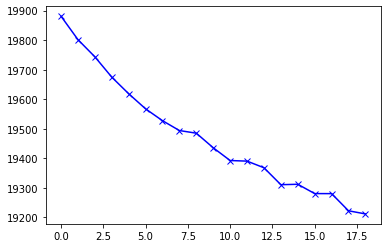

In [51]:
scores_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')

In [53]:
kmeans = KMeans(8)
kmeans.fit(x)
labels = kmeans.labels_

In [54]:
kmeans.cluster_centers_.shape

(8, 13571)

In [55]:
labels.shape

(20000,)

In [56]:
print('max', labels.max())
print('min', labels.min())

max 7
min 0


In [57]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([5, 5, 2, ..., 5, 7, 5], dtype=int32)

In [67]:
news_df_cluster = pd.concat([news_df['Date'][:20000], df, pd.DataFrame({'cluster':labels})], axis = 1)
news_df_cluster.head()

,Date,headline_text,cluster
0,2001-01-01,win over cena satisfying but defeating underta...,1.0
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,1.0
2,2001-01-02,fissures in hurriyat over pak visit,4.0
3,2001-01-02,america s unwanted heading for india,6.0
4,2001-01-02,for bigwigs it is destination goa,6.0


In [68]:
news_df_cluster.shape

(21576, 3)

In [69]:
import seaborn as sns

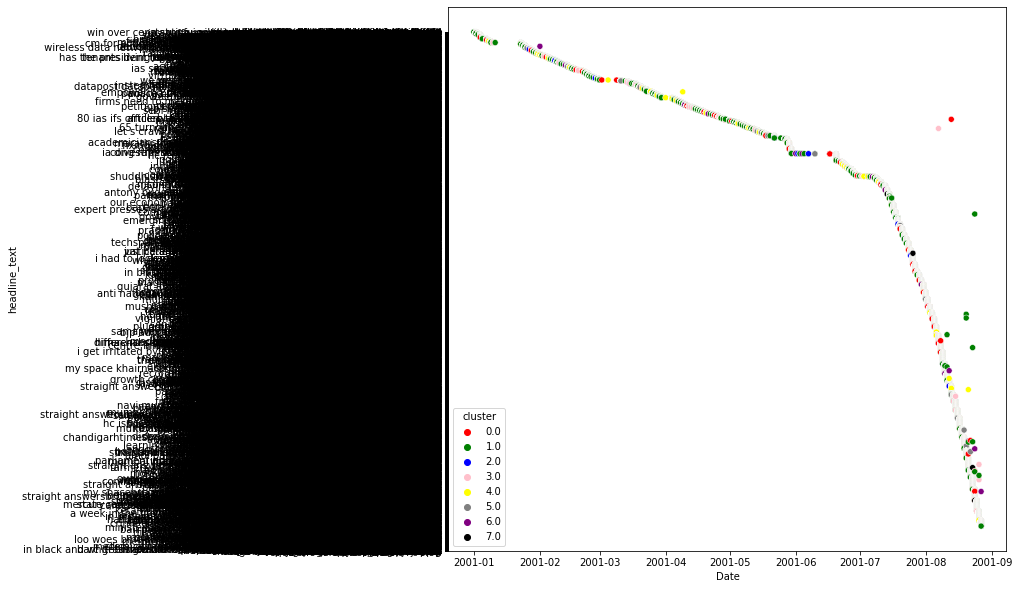

In [70]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Date", y="headline_text", hue = "cluster", data = news_df_cluster, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

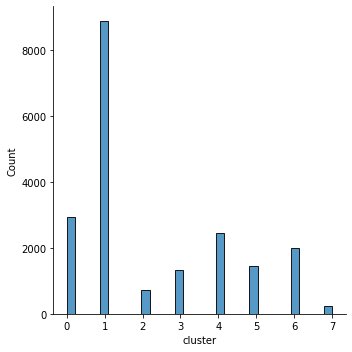

In [80]:
sns.displot(x='cluster', data=news_df_cluster)

In [ ]:
kmeans = KMeans(8)
kmeans.fit(x)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(x)

news_df_cluster = pd.concat([news_df['Date'][:20000], df, pd.DataFrame({'cluster':labels})], axis = 1)
sns.displot(x='cluster', data=news_df_cluster)